# Estudo retrospectivo de desempenho acadêmico no Ensino Superior Nacional 
## Sob ponto de vista de sexo do participante considerando aspectos socioeconômicos

In [1]:
## Import libraries
import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt
import os 
import warnings
warnings.filterwarnings('ignore')

In [2]:
power_analysis = smp.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.75, power=0.7, alpha=0.1)
sample_size

17.44423637160863

## Importação dos dados
Os dados utilizados são dos ENADEs feitos em 2010 e 2019 no Brasil.

In [3]:
## Get list of files in "Dados/ENADE" directory
files = os.listdir("Dados/ENADE")

## Get list of csv or txt data, excluding year 2009
enade_list = [enade for enade in files 
              if ((".csv" in enade) or (".txt" in enade)) 
              and ("2009" not in enade)]

# enade_list

In [4]:
## Get list of years
anos = [ano.split("_")[2].split(".")[0] for ano in enade_list]
# anos

In [5]:
## Get dictionary of ENADE data, indexed by year (data not yet included)
dados_enade_completo = {ano: None for ano in anos}
colunas = {ano: None for ano in anos}

## Segmentação e filtragem

In [6]:
import pandas as pd

## List of columns
colunas['2010'] = ['CO_MODALIDADE', 'TP_SEXO', 'NT_GER', 'QE_I02', 'QE_I13', 'QE_I14', 'QE_I03', 'QE_I05', 'QE_I06', 'QE_I07', 'QE_I12', 'QE_I18', 'QE_I01', 'QE_I20', 'ANO_FIM_2G']
colunas['2011'] = ['CO_MODALIDADE', 'TP_SEXO', 'NT_GER', 'QE_I02', 'QE_I13', 'QE_I14', 'QE_I03', 'QE_I05', 'QE_I06', 'QE_I07', 'QE_I12', 'QE_I18', 'QE_I01', 'QE_I20', 'ANO_FIM_2G']
colunas['2012'] = ['CO_MODALIDADE', 'TP_SEXO', 'NT_GER', 'QE_I02', 'QE_I13', 'QE_I14', 'QE_I03', 'QE_I05', 'QE_I06', 'QE_I07', 'QE_I12', 'QE_I18', 'QE_I01', 'QE_I20', 'ANO_FIM_2G']
colunas['2013'] = ['CO_MODALIDADE', 'TP_SEXO', 'NT_GER', 'QE_I02', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07', 'QE_I08', 'QE_I09', 'QE_I14', 'QE_I16', 'QE_I01', 'QE_I22', 'ANO_FIM_2G']
colunas['2014'] = ['CO_MODALIDADE', 'TP_SEXO', 'NT_GER', 'QE_I02', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I15', 'QE_I17', 'QE_I21', 'QE_I23', 'ANO_FIM_2G']
colunas['2015'] = ['CO_MODALIDADE', 'TP_SEXO', 'NT_GER', 'QE_I02', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I15', 'QE_I17', 'QE_I21', 'QE_I23', 'ANO_FIM_2G']
colunas['2016'] = ['CO_MODALIDADE', 'TP_SEXO', 'NT_GER', 'QE_I02', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I15', 'QE_I17', 'QE_I21', 'QE_I23', 'ANO_FIM_2G']
colunas['2017'] = ['CO_MODALIDADE', 'TP_SEXO', 'NT_GER', 'QE_I02', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I15', 'QE_I17', 'QE_I21', 'QE_I23', 'ANO_FIM_EM']
colunas['2018'] = ['CO_MODALIDADE', 'TP_SEXO', 'NT_GER', 'QE_I02', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I15', 'QE_I17', 'QE_I21', 'QE_I23', 'ANO_FIM_EM']
colunas['2019'] = ['CO_MODALIDADE', 'TP_SEXO', 'NT_GER', 'QE_I02', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I15', 'QE_I17', 'QE_I01', 'QE_I23', 'ANO_FIM_EM']

for enade in enade_list:
    ## Get year
    ano = enade.split("_")[2].split(".")[0]
    ## Store data in dictionary indexed by year
    if ano == '2010' or ano == '2011' or ano == '2012' or ano == '2013' or ano == '2014' or ano == '2015' or ano == '2016':
        dados_enade_completo[ano] = pd.read_csv("Dados/ENADE/" + enade, encoding= 'unicode_escape', delimiter=';', decimal = '.', usecols=colunas[ano], low_memory=False)
    else:
        dados_enade_completo[ano] = pd.read_csv("Dados/ENADE/" + enade, encoding= 'unicode_escape', delimiter=';', decimal = ',', usecols=colunas[ano], low_memory=False)        

novos_nomes = ['MODALIDADE', 'SEXO', 'NOTA', 'Q01', 'Q02', 'Q03', 'Q04', 'Q05', 'Q06', 'Q07', 'Q08', 'Q09', 'Q10', 'Q11', 'Q12']

for ano in anos:
    for item in range(0, len(novos_nomes)):
        dados_enade_completo[ano].rename(columns={colunas[ano][item]: novos_nomes[item]}, inplace=True)

dados_enade = {ano: dados_enade_completo[ano].dropna() for ano in anos}

# Corrigir labels de modalidade do ano de 2018 (0: EAD, 1: Presencial)
dados_enade['2018']["MODALIDADE"].replace({2: 0}, inplace=True)
print('Finalizado!')

Finalizado!


## Estatísticas entre homens e mulheres


*   Pessoas que não trabalham vs pessoas que trabalham pelo menos 20h/semana
 * Q07: \[A\] vs \[B, C, D, E\]
*   Pessoas que estudam na modalidade EAD vs pessoas que estudam na modalidade presencial
 * MODALIDADE: \[0\] vs \[1\]

* Cor, sexo e renda
 * Brancos e negros 
   * Q01: \[A\] vs \[B\]
 * Até 3 salários mínimos
   * Q05: \[A\, B\]



### Separando por sexo

In [7]:
enade_por_sexo = {"M": {}, "F": {}}
for ano in anos:
    enade_por_sexo["M"][ano] =  dados_enade[ano].query('SEXO == "M"')
    enade_por_sexo["F"][ano] =  dados_enade[ano].query('SEXO == "F"')

enade_por_sexo["M"]['2019']

,MODALIDADE,SEXO,Q12,NOTA,Q10,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q11
0,1,M,2010,51.9,E,C,D,E,C,B,C,A,A,B,D
1,1,M,2009,54.2,A,A,E,D,B,E,C,A,A,B,D
3,1,M,2013,42.1,A,D,F,F,B,E,B,A,A,B,D
5,1,M,2011,49.3,A,A,E,E,D,C,C,D,A,B,E
6,1,M,2012,49.6,A,A,E,E,B,E,B,A,A,B,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433915,1,M,2015,87.0,A,A,B,B,B,C,B,A,A,A,C
433923,1,M,2015,85.4,A,A,E,F,B,E,B,A,A,A,E
433926,1,M,2015,61.3,A,A,E,E,B,E,B,A,A,B,B
433927,1,M,2013,66.8,A,D,D,D,B,A,A,A,A,A,C


In [8]:
import numpy as np
from scipy import stats

media_homem_mulher = {"M":[], "F":[]}
for ano in anos:
    media_homem_mulher["M"].append(enade_por_sexo["M"][ano]["NOTA"].mean())
    media_homem_mulher["F"].append(enade_por_sexo["F"][ano]["NOTA"].mean())

print(f'{media_homem_mulher["M"]} \n')
print(f'{media_homem_mulher["F"]} \n')

resultado=stats.ttest_ind(media_homem_mulher["M"],  media_homem_mulher["F"], equal_var = False)
resultado

[41.325648545331944, 40.26944482358623, 39.21264394704683, 47.06194795403102, 44.43173681811227, 45.923847800711044, 49.759641414235396, 44.090361828985486, 42.90581542633657, 43.33719426145626] 

[40.33379768769723, 44.303927612251385, 37.49758483597251, 44.697384213370995, 44.32259030012788, 43.570065377189444, 46.18772707070871, 43.23510851269002, 41.12259728684247, 44.71613896013044] 



Ttest_indResult(statistic=0.6400037940143387, pvalue=0.5305636617084619)

#### Histograma Homem e Mulher

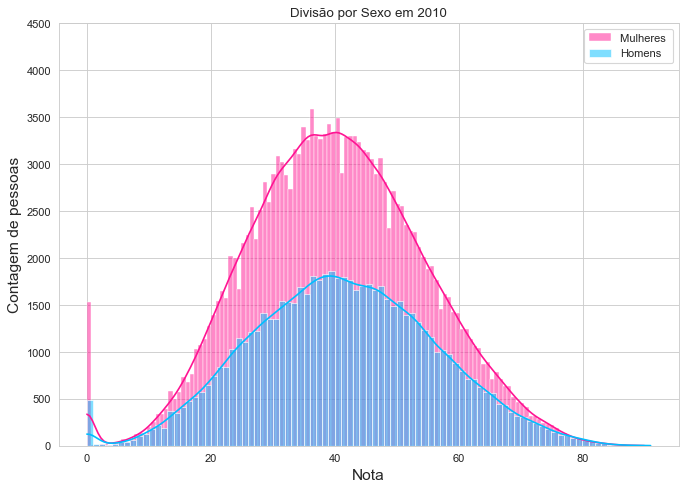

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")


a1 = enade_por_sexo["M"]['2010']["NOTA"] # Homem 
a2 = enade_por_sexo["F"]['2010']["NOTA"] # Mulher
a1_media=str(round(a1.mean(), 3))
a2_media=str(round(a2.mean(), 3))
a1_label='Homens'
a2_label='Mulheres '


plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(a2, color="deeppink", label=a2_label, kde=True)
sns.histplot(a1, color="deepskyblue", label=a1_label, kde=True)

escala=4500
plt.ylim(0, escala)

plt.xlabel("Nota", size=14)
plt.ylabel("Contagem de pessoas", size=14)
plt.title("Divisão por Sexo em 2010")
plt.legend(loc='upper right');


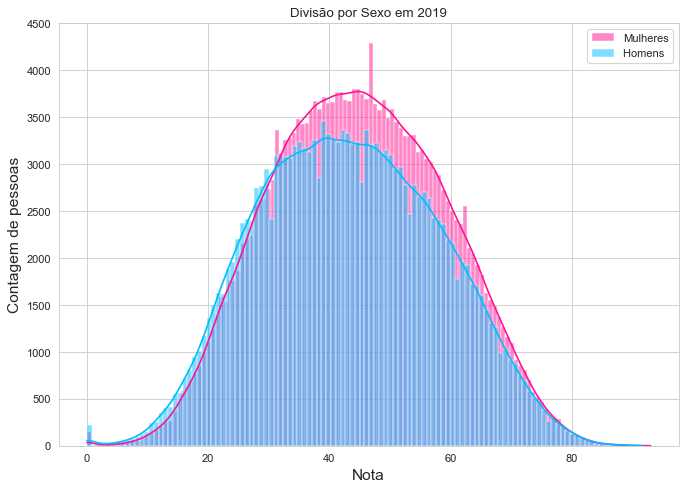

In [26]:
b1 = enade_por_sexo["M"]['2019']["NOTA"] # Homem Preto até 3M
b2 = enade_por_sexo["F"]['2019']["NOTA"] # "Mulher preta até 3M

b1_media=str(round(b1.mean(), 3))
b2_media=str(round(b2.mean(), 3))

b1_label='Homens '
b2_label='Mulheres'


plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(b2, color="deeppink", label=b2_label, kde=True)
sns.histplot(b1, color="deepskyblue", label=b1_label, kde=True)


plt.ylim(0, escala)

plt.xlabel("Nota", size=14)
plt.ylabel("Contagem de pessoas", size=14)
plt.title("Divisão por Sexo em 2019")
plt.legend(loc='upper right');



#### Boxplots Homem e Mulher

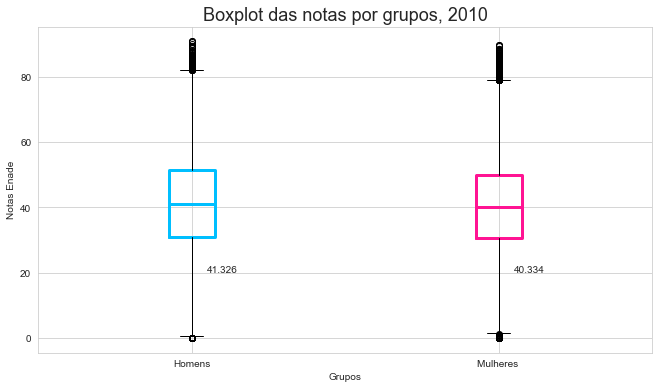

In [11]:
#a1 Homem preto até 3M
#a2 Mulher preta até 3M


dados2010=[a1,a2]
#print(dados2010)

# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 6))



#Plotando o boxplot 
bplots = plt.boxplot(dados2010,  vert = 1, patch_artist = False, labels=[a1_label, a2_label])
colors = ['deepskyblue', 'deeppink']
c = 0
for i, bplot in enumerate(bplots['boxes']):
    bplot.set(color=colors[c], linewidth=3)
    c += 1

c4 = 0
for median in bplots['medians']:
    median.set(color=colors[c4], linewidth=3)
    c4 +=1


# Adicionando Título ao gráfico
plt.title("Boxplot das notas por grupos, 2010", loc="center", fontsize=18)
plt.xlabel("Grupos")
plt.ylabel("Notas Enade")
plt.text(1.05, 20, a1_media)
plt.text(2.05, 20, a2_media);

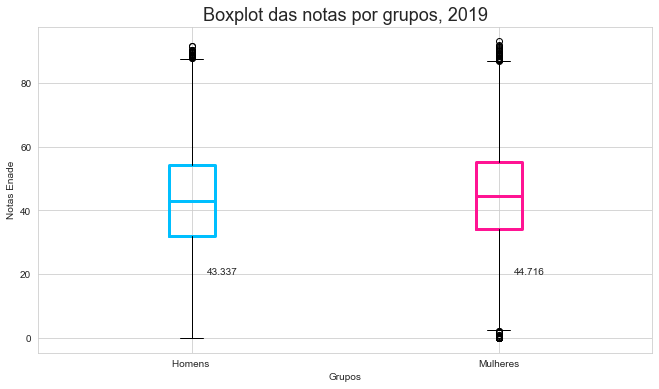

In [12]:
#b1 Homem Preto até 3M
#b2 "Mulheres preta até 3M


dados2019=[b1,b2]
#print(dados2010)

# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 6))

#Plotando o boxplot 
bplots = plt.boxplot(dados2019,  vert = 1, patch_artist = False, labels=[b1_label, b2_label])
colors = ['deepskyblue', 'deeppink']
c = 0
for i, bplot in enumerate(bplots['boxes']):
    bplot.set(color=colors[c], linewidth=3)
    c += 1

c4 = 0
for median in bplots['medians']:
    median.set(color=colors[c4], linewidth=3 )
    c4 +=1


# Adicionando Título ao gráfico
plt.title("Boxplot das notas por grupos, 2019", loc="center", fontsize=18)
plt.xlabel("Grupos")
plt.ylabel("Notas Enade")
plt.text(1.05, 20, b1_media)
plt.text(2.05, 20, b2_media);

## Trabalho

### Pessoas que não trabalham

In [14]:
media_pessoas_sem_trabalho = {"M":[], "F":[]}
for ano in anos:
    media_pessoas_sem_trabalho["M"].append(enade_por_sexo["M"][ano].query("Q07 in ['A']")["NOTA"].mean())
    media_pessoas_sem_trabalho["F"].append(enade_por_sexo["F"][ano].query("Q07 in ['A']")["NOTA"].mean())

# print(media_pessoas_sem_trabalho["M"])
# print(media_pessoas_sem_trabalho["F"])

### Pessoas que trabalham

In [15]:
media_pessoas_com_trabalho = {"M":[], "F":[]}
for ano in anos:
    media_pessoas_com_trabalho["M"].append(enade_por_sexo["M"][ano].query("Q07 in ['B', 'C', 'D', 'E']")["NOTA"].mean())
    media_pessoas_com_trabalho["F"].append(enade_por_sexo["F"][ano].query("Q07 in ['B', 'C', 'D', 'E']")["NOTA"].mean())

# print(media_pessoas_com_trabalho["M"])
# print(media_pessoas_com_trabalho["F"])

### Comparação de pessoas que não trabalham versus pessoas que trabalham do mesmo sexo

In [17]:
from scipy import stats

homens_contra_homens_q07 = stats.ttest_ind(media_pessoas_sem_trabalho["M"],  media_pessoas_com_trabalho["M"], equal_var = False)
mulheres_contra_mulheres_q07 = stats.ttest_ind(media_pessoas_sem_trabalho["F"],  media_pessoas_com_trabalho["F"], equal_var = False)

print(homens_contra_homens_q07)
print(mulheres_contra_mulheres_q07)

Ttest_indResult(statistic=2.4797570479020923, pvalue=0.02442702518456993)
Ttest_indResult(statistic=2.5797896704580134, pvalue=0.018981127843211716)


Com os resultados observados, podemos rejeitar a hipótese nula de que homens que trabalham têm média semelhante à de homens que não trabalham. Uma conclusão idêntica pode ser observada para o conjunto de mulheres.

### Comparação de homens que não trabalham versus mulheres que não trabalham

In [18]:
homens_contra_mulheres_q07_sem_trabalho = stats.ttest_ind(media_pessoas_sem_trabalho["M"],  media_pessoas_sem_trabalho["F"], equal_var = False)
print(homens_contra_mulheres_q07_sem_trabalho)

Ttest_indResult(statistic=1.128008788677948, pvalue=0.27571276229151775)


Com o resultado observado, falhamos em rejeitar a hipótese nula de que homens que não trabalham têm média diferente de mulheres que não trabalham.

### Comparação de homens que trabalham versus mulheres que trabalham

In [20]:
homens_contra_mulheres_q07_com_trabalho = stats.ttest_ind(media_pessoas_com_trabalho["M"],  media_pessoas_com_trabalho["F"], equal_var = False)
print(homens_contra_mulheres_q07_com_trabalho)

Ttest_indResult(statistic=0.8376996849282302, pvalue=0.4133059888878087)


Com o resultado observado, falhamos em rejeitar a hipótese nula de que homens que trabalham têm média diferente de mulheres que trabalham.

### Histogramas de Pessoas que trabalham e Pessoas que não trabalham

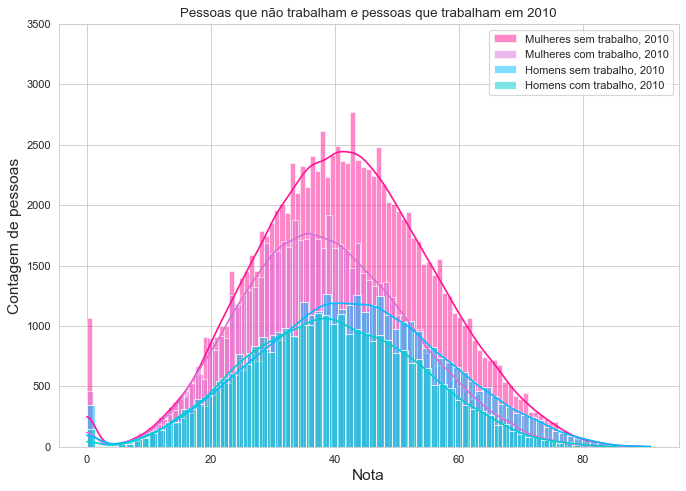

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

x1 = enade_por_sexo["M"]['2010'].query("Q07 in ['A']")["NOTA"] # "Homens sem trabalho, 2010"
x2 = enade_por_sexo["M"]['2010'].query("Q07 in ['B', 'C', 'D','E']")["NOTA"]  # "Homens com trabalho, 2010"
x3 = enade_por_sexo["F"]['2010'].query("Q07 in ['A']")["NOTA"] # "Mulheres sem trabalho, 2010"
x4 = enade_por_sexo["F"]['2010'].query("Q07 in ['B', 'C', 'D','E']")["NOTA"]  # "Mulheres com trabalho, 2010")

plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(x3, color="deeppink", label="Mulheres sem trabalho, 2010", kde=True)
sns.histplot(x4, color="orchid", label="Mulheres com trabalho, 2010", kde=True)
sns.histplot(x1, color="deepskyblue", label="Homens sem trabalho, 2010", kde=True)
sns.histplot(x2, color="darkturquoise", label="Homens com trabalho, 2010", kde=True)


plt.ylim(0, 3500)

plt.xlabel("Nota", size=14)
plt.ylabel("Contagem de pessoas", size=14)
plt.title("Pessoas que não trabalham e pessoas que trabalham em 2010")
plt.legend(loc='upper right');

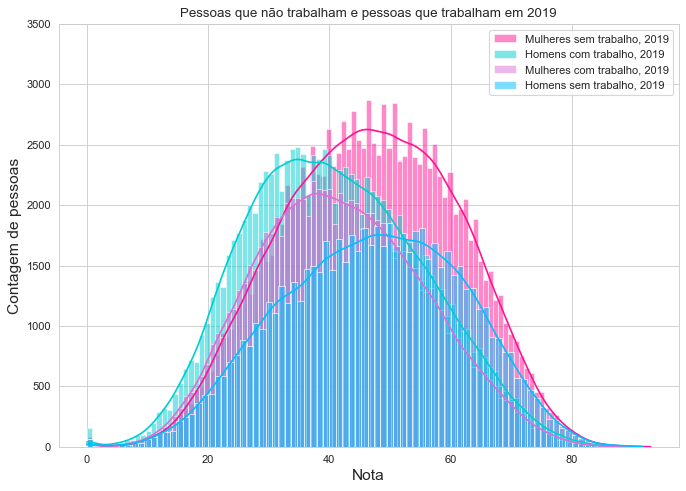

In [24]:
z1 = enade_por_sexo["M"]['2019'].query("Q07 in ['A']")["NOTA"] # "Homens sem trabalho, 2019"
z2 = enade_por_sexo["M"]['2019'].query("Q07 in ['B', 'C', 'D','E']")["NOTA"]  # "Homens com trabalho, 2019"
z3 = enade_por_sexo["F"]['2019'].query("Q07 in ['A']")["NOTA"] # "Mulheres sem trabalho, 2019"
z4 = enade_por_sexo["F"]['2019'].query("Q07 in ['B', 'C', 'D','E']")["NOTA"]  # "Mulheres com trabalho, 2019")

plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(z3, color="deeppink", label="Mulheres sem trabalho, 2019", kde=True)
sns.histplot(z2, color="darkturquoise", label="Homens com trabalho, 2019", kde=True)

sns.histplot(z4, color="orchid", label="Mulheres com trabalho, 2019", kde=True)
sns.histplot(z1, color="deepskyblue", label="Homens sem trabalho, 2019", kde=True)


plt.ylim(0, 3500)

plt.xlabel("Nota", size=14)
plt.ylabel("Contagem de pessoas", size=14)
plt.title("Pessoas que não trabalham e pessoas que trabalham em 2019")
plt.legend(loc='upper right');

### Boxplots de Pessoas que trabalham e Pessoas que não trabalham

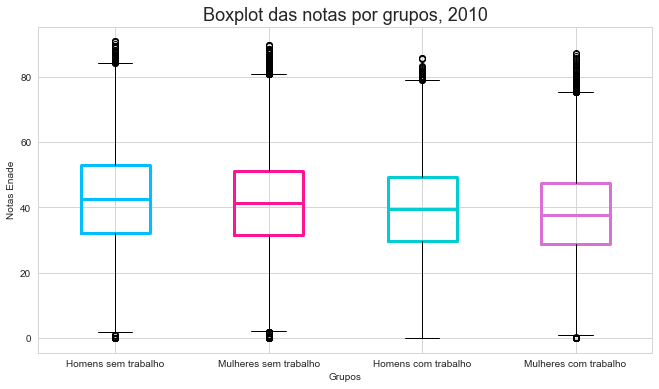

In [27]:
x1 = enade_por_sexo["M"]['2010'].query("Q07 in ['A']")["NOTA"] # "Homens sem trabalho, 2010"
x2 = enade_por_sexo["M"]['2010'].query("Q07 in ['B', 'C', 'D','E']")["NOTA"]  # "Homens com trabalho, 2010"
x3 = enade_por_sexo["F"]['2010'].query("Q07 in ['A']")["NOTA"] # "Mulheres sem trabalho, 2010"
x4 = enade_por_sexo["F"]['2010'].query("Q07 in ['B', 'C', 'D','E']")["NOTA"]  # "Mulheres com trabalho, 2010")

dados2010=[x1,x3,x2,x4]
#print(dados2010)

# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 6))

#Plotando o boxplot 
bplots = plt.boxplot(dados2010,  vert = 1, patch_artist = False, labels=["Homens sem trabalho", "Mulheres sem trabalho","Homens com trabalho", "Mulheres com trabalho" ])
colors = ['deepskyblue', 'deeppink','darkturquoise',  'orchid']
c = 0
for i, bplot in enumerate(bplots['boxes']):
    bplot.set(color=colors[c], linewidth=3)
    c += 1

c4 = 0
for median in bplots['medians']:
    median.set(color=colors[c4], linewidth=3)
    c4 +=1



# Adicionando Título ao gráfico
plt.title("Boxplot das notas por grupos, 2010", loc="center", fontsize=18)
plt.xlabel("Grupos")
plt.ylabel("Notas Enade");

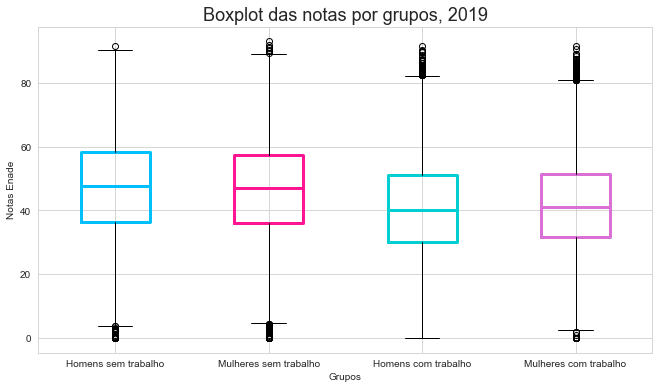

In [28]:
z1 = enade_por_sexo["M"]['2019'].query("Q07 in ['A']")["NOTA"] # "Homens sem trabalho, 2019"
z2 = enade_por_sexo["M"]['2019'].query("Q07 in ['B', 'C', 'D','E']")["NOTA"]  # "Homens com trabalho, 2019"
z3 = enade_por_sexo["F"]['2019'].query("Q07 in ['A']")["NOTA"] # "Mulheres sem trabalho, 2019"
z4 = enade_por_sexo["F"]['2019'].query("Q07 in ['B', 'C', 'D','E']")["NOTA"]  # "Mulheres com trabalho, 2019")

dados2019=[z1,z3,z2,z4]
#print(dados2019)

# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 6))

#Plotando o boxplot 
bplots = plt.boxplot(dados2019,  vert = 1, patch_artist = False, labels=["Homens sem trabalho", "Mulheres sem trabalho","Homens com trabalho", "Mulheres com trabalho" ])
colors = ['deepskyblue', 'deeppink','darkturquoise',  'orchid']
c = 0
for i, bplot in enumerate(bplots['boxes']):
    bplot.set(color=colors[c], linewidth=3)
    c += 1

c4 = 0
for median in bplots['medians']:
    median.set(color=colors[c4], linewidth=3)
    c4 +=1



# Adicionando Título ao gráfico
plt.title("Boxplot das notas por grupos, 2019", loc="center", fontsize=18)
plt.xlabel("Grupos")
plt.ylabel("Notas Enade");

## Modalidade

### Ensino EAD

In [30]:
media_ensino_ead = {"M":[], "F":[]}
for ano in anos:
    media_ensino_ead["M"].append(enade_por_sexo["M"][ano].query("MODALIDADE in [0]")["NOTA"].mean())
    media_ensino_ead["F"].append(enade_por_sexo["F"][ano].query("MODALIDADE in [0]")["NOTA"].mean())

# print(media_ensino_ead["M"])
# print(media_ensino_ead["F"])

### Ensino Presencial

In [31]:
media_ensino_presencial = {"M":[], "F":[]}
for ano in anos:
    media_ensino_presencial["M"].append(enade_por_sexo["M"][ano].query("MODALIDADE in [1]")["NOTA"].mean())
    media_ensino_presencial["F"].append(enade_por_sexo["F"][ano].query("MODALIDADE in [1]")["NOTA"].mean())

# print(media_ensino_presencial["M"])
# print(media_ensino_presencial["F"])

### Comparação de ensino EAD versus ensino presencial do mesmo sexo

In [32]:
homens_contra_homens_modalidade = stats.ttest_ind(media_ensino_ead["M"],  media_ensino_presencial["M"], equal_var = False)
mulheres_contra_mulheres_modalidade = stats.ttest_ind(media_ensino_ead["F"],  media_ensino_presencial["F"], equal_var = False)

print(homens_contra_homens_modalidade)
print(mulheres_contra_mulheres_modalidade)

Ttest_indResult(statistic=-3.2755102204533917, pvalue=0.004852829809332253)
Ttest_indResult(statistic=-3.815745347430319, pvalue=0.0014745228974184688)


Com os resultados observados, podemos rejeitar a hipótese nula de que homens que estudam pelo modelo EAD têm média semelhante à de homens estudam pelo modelo presencial. Uma conclusão idêntica pode ser observada para o conjunto de mulheres.

### Comparação de homens do modelo EAD versus mulheres do modelo EAD

In [33]:
homens_contra_mulheres_ead = stats.ttest_ind(media_ensino_ead["M"],  media_ensino_ead["F"], equal_var = False)
print(homens_contra_mulheres_ead)

Ttest_indResult(statistic=1.3669352470058589, pvalue=0.19225651470861535)


Com o resultado observado, falhamos em rejeitar a hipótese nula de que homens que estudam pelo modelo EAD têm média diferente de mulheres que estudam pelo modelo EAD.

### Comparação de homens que do modelo presencial versus mulheres do modelo presencial

In [34]:
homens_contra_mulheres_presencial = stats.ttest_ind(media_ensino_presencial["M"],  media_ensino_presencial["F"], equal_var = False)
print(homens_contra_mulheres_presencial)

Ttest_indResult(statistic=0.34538283693733973, pvalue=0.7339859867968933)


Com o resultado observado, falhamos em rejeitar a hipótese nula de que homens que estudam pelo modelo presencial têm média diferente de mulheres que estudam pelo modelo presencial.

### Histogramas de alunos EAD e alunos presenciais

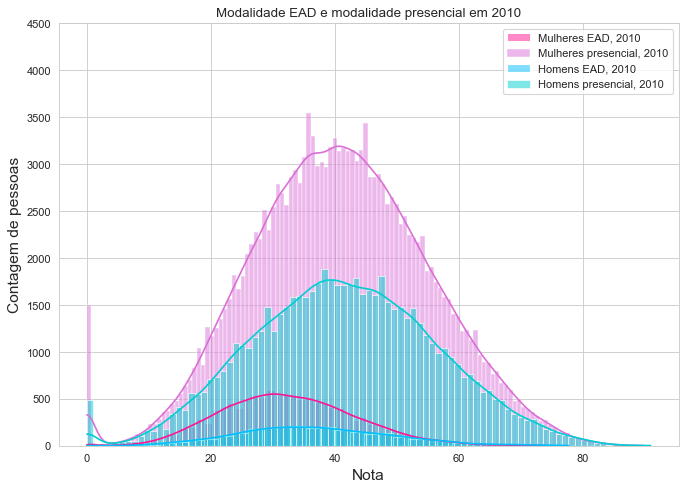

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

a1 = enade_por_sexo["M"]['2010'].query("MODALIDADE in [0]")["NOTA"] # "Homens EAD, 2010"
a2 = enade_por_sexo["M"]['2010'].query("MODALIDADE in [1]")["NOTA"]  # "Homens presencial, 2010"
a3 = enade_por_sexo["F"]['2010'].query("MODALIDADE in [0]")["NOTA"] # "Mulheres EAD, 2010"
a4 = enade_por_sexo["F"]['2010'].query("MODALIDADE in [1]")["NOTA"]  # "Mulheres presencial, 2010")

plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(a3, color="deeppink", label="Mulheres EAD, 2010", kde=True)
sns.histplot(a4, color="orchid", label="Mulheres presencial, 2010", kde=True)
sns.histplot(a1, color="deepskyblue", label="Homens EAD, 2010", kde=True)
sns.histplot(a2, color="darkturquoise", label="Homens presencial, 2010", kde=True)


plt.ylim(0, 4500)

plt.xlabel("Nota", size=14)
plt.ylabel("Contagem de pessoas", size=14)
plt.title("Modalidade EAD e modalidade presencial em 2010")
plt.legend(loc='upper right');

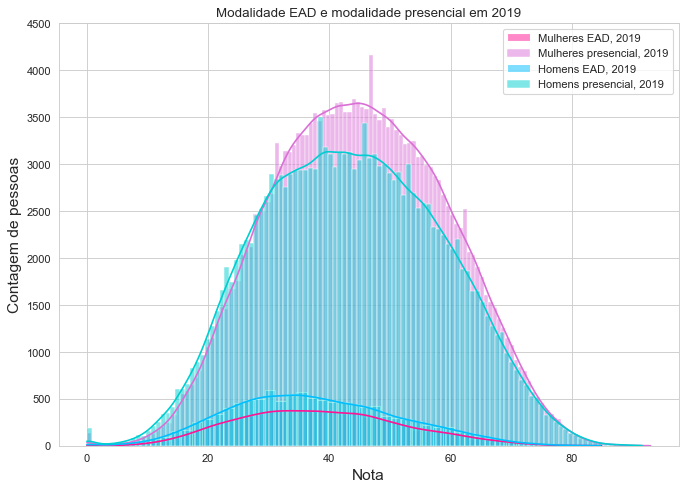

In [36]:
b1 = enade_por_sexo["M"]['2019'].query("MODALIDADE in [0]")["NOTA"] # "Homens EAD, 2019"
b2 = enade_por_sexo["M"]['2019'].query("MODALIDADE in [1]")["NOTA"]  # "Homens presencial, 2019"
b3 = enade_por_sexo["F"]['2019'].query("MODALIDADE in [0]")["NOTA"] # "Mulheres EAD, 2019"
b4 = enade_por_sexo["F"]['2019'].query("MODALIDADE in [1]")["NOTA"]  # "Mulheres presencial, 2019")

plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(b3, color="deeppink", label="Mulheres EAD, 2019", kde=True)
sns.histplot(b4, color="orchid", label="Mulheres presencial, 2019", kde=True)
sns.histplot(b1, color="deepskyblue", label="Homens EAD, 2019", kde=True)
sns.histplot(b2, color="darkturquoise", label="Homens presencial, 2019", kde=True)


plt.ylim(0, 4500)

plt.xlabel("Nota", size=14)
plt.ylabel("Contagem de pessoas", size=14)
plt.title("Modalidade EAD e modalidade presencial em 2019")
plt.legend(loc='upper right');

### Boxplots de alunos EAD e alunos presenciais

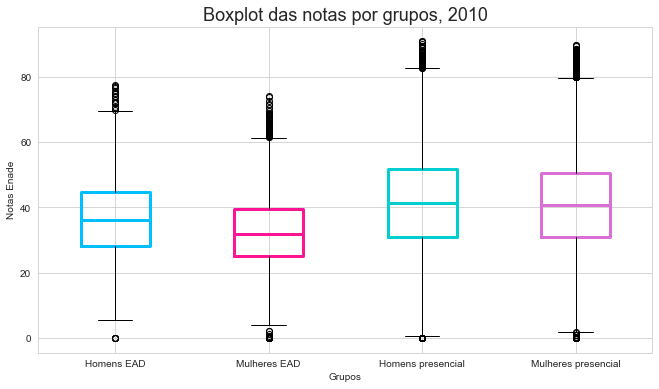

In [40]:
dados2010=[a1,a3,a2,a4]
#print(dados2010)

# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 6))

#Plotando o boxplot 
bplots = plt.boxplot(dados2010,  vert = 1, patch_artist = False, labels=["Homens EAD", "Mulheres EAD","Homens presencial", "Mulheres presencial" ])
colors = ['deepskyblue', 'deeppink','darkturquoise',  'orchid']
c = 0
for i, bplot in enumerate(bplots['boxes']):
    bplot.set(color=colors[c], linewidth=3)
    c += 1

c4 = 0
for median in bplots['medians']:
    median.set(color=colors[c4], linewidth=3)
    c4 +=1

# Adicionando Título ao gráfico
plt.title("Boxplot das notas por grupos, 2010", loc="center", fontsize=18)
plt.xlabel("Grupos")
plt.ylabel("Notas Enade");

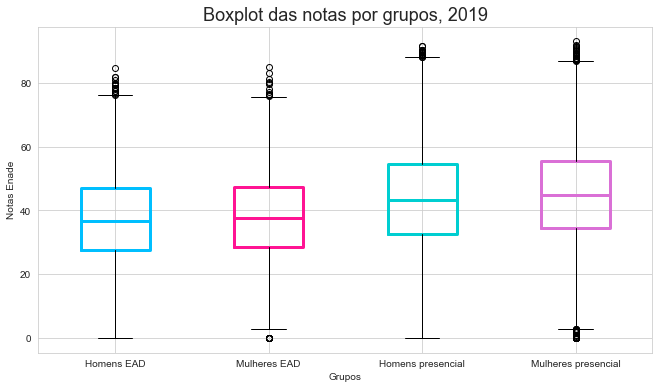

In [39]:
dados2019=[b1,b3,b2,b4]
#print(dados2010)

# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 6))

#Plotando o boxplot 
bplots = plt.boxplot(dados2019,  vert = 1, patch_artist = False, labels=["Homens EAD", "Mulheres EAD","Homens presencial", "Mulheres presencial" ])
colors = ['deepskyblue', 'deeppink','darkturquoise',  'orchid']
c = 0
for i, bplot in enumerate(bplots['boxes']):
    bplot.set(color=colors[c], linewidth=3)
    c += 1

c4 = 0
for median in bplots['medians']:
    median.set(color=colors[c4], linewidth=3)
    c4 +=1

# Adicionando Título ao gráfico
plt.title("Boxplot das notas por grupos, 2019", loc="center", fontsize=18)
plt.xlabel("Grupos")
plt.ylabel("Notas Enade");